In [ ]:
#Mounting (connecting) google drive to Collab
from google.colab import drive

# Mount Google Drive to /content/drive/MyDrive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

#Setwd
os.chdir('/content/drive/MyDrive/UW/BBIO340/PROJECT 1')

#List contents of current directory
contents = os.listdir()
print("Contents of the Google Drive directory:")
for item in contents:
    print(item)


Contents of the Google Drive directory:
VDJDB2.txt
VDJDB1.txt
VDJDB2.csv
VDJDB1.csv
[1]Analysis.ipynb


In [ ]:
#IMPORTING DATA
import pandas as pd
data1=pd.read_csv("VDJDB1.csv")
data2=pd.read_csv("VDJDB2.csv")

#combining dfs
VDJDB = pd.concat([data1,data2], ignore_index=True)

#checking dimensions
print(data1.shape)
print(data2.shape)
print(VDJDB.shape)

(249, 12)
(84185, 12)
(84434, 12)


In [ ]:
#This DF lists 'TriticumAestivum'&'Wheat'as different things, they are both wheat
#Replacing all occurances of TriticumAestivum' w/ 'Wheat'
VDJDB['Epitope species'] = VDJDB['Epitope species'].replace('TriticumAestivum', 'Wheat')

In [ ]:
#IDENTIFYING ALL CROSS-REACTIVE TCRs
#Identifying all CDR3 seqs that are duplicated
duplicated_seqs=VDJDB[VDJDB.duplicated(subset="CDR3",keep=False)]

#Creating sub_df / each type of duplicated CDR3 seq.
  #create seperate dfs / unique CDR3 seq.
unique_seqs = duplicated_seqs["CDR3"].unique()

  #Create dictionary to store each sub_df
unique_seq_folder={}

  #For Loop: organizing rows according to their unique CDR3 seqs
for CDR3 in unique_seqs:
  sub_df = duplicated_seqs[duplicated_seqs["CDR3"]==CDR3]
  unique_seq_folder[CDR3]=sub_df

#Isolating only dfs w/ CDR3 seq.s that matched at least 2 different types of unique epitope species
  #Creating dictinoary to store only dfs that have cross-reactive CDR3s
crossreactive_seqs={}

  #For Loop: iterate over unique CDR3 seqs / sub_df
for CDR3, sub_df in unique_seq_folder.items():

  #checking for dfs w/ 2+ unique values in column "Epitope species"
  if sub_df['Epitope species'].nunique() >= 2:
    crossreactive_seqs[CDR3]=sub_df


In [ ]:
#Creating DFS for each cross-reactive CDR3-sub-df in crossreactive_seqs dict
#list to hold all new dfs (each df all has same CDR3 seq, 2+ different epitope spp.)
separate_dfs = []

#for loop to create new sub-dfs
for key, value in crossreactive_seqs.items():
  separate_dfs.append(pd.DataFrame(value))

#show first df
print(separate_dfs[0])

      Gene            CDR3           V           J      Species  \
31     TRB  CASSLGGSTDTQYF  TRBV7-2*01  TRBJ2-3*01  HomoSapiens   
280    TRB  CASSLGGSTDTQYF  TRBV7-3*01  TRBJ2-3*01  HomoSapiens   
8047   TRB  CASSLGGSTDTQYF  TRBV7-3*01  TRBJ2-3*01  HomoSapiens   
41973  TRB  CASSLGGSTDTQYF  TRBV7-2*01  TRBJ2-3*01  HomoSapiens   

                MHC A           MHC B MHC class          Epitope Epitope gene  \
31     HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII      PQPELPYPQPE       Gluten   
280    HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII  LQPFPQPELPYPQPQ      Gliadin   
8047         HLA-A*02             B2M      MHCI        NLVPMVATV         pp65   
41973  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII      PQPELPYPQPE       Gluten   

      Epitope species      Reference  
31              Wheat  PMID:21849672  
280             Wheat  PMID:31956412  
8047              CMV  PMID:28423320  
41973           Wheat  PMID:21849672  


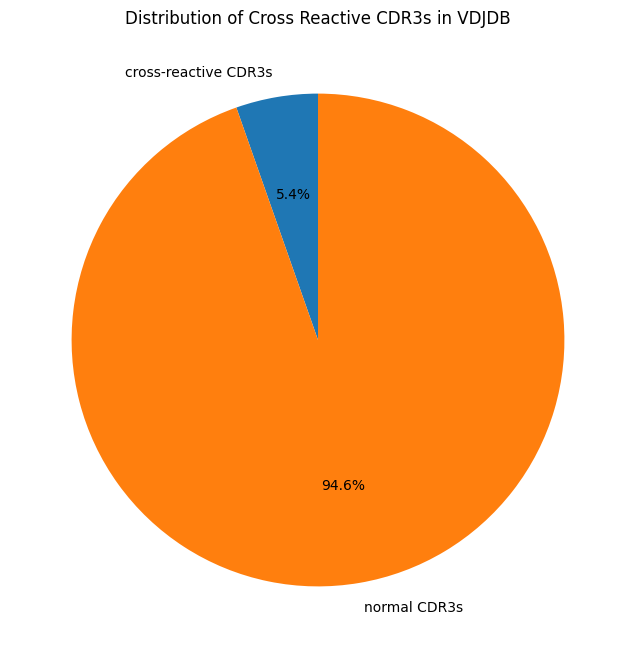

In [ ]:
#VISUALIZATION - % of cross-reactive CDR3s in VDJDB PIECHART
#getting values
CR_CDR3_count = len(separate_dfs)
Total_CDR3_count = VDJDB["CDR3"].nunique()
non_CR_CDR3_count = Total_CDR3_count - CR_CDR3_count

#Setting Pie Chart Values
labels = ['cross-reactive CDR3s', 'normal CDR3s']
values = [(CR_CDR3_count/Total_CDR3_count),(non_CR_CDR3_count/Total_CDR3_count)]

#Visualization code
import matplotlib.pyplot as plt
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cross Reactive CDR3s in VDJDB')
plt.show()

In [ ]:
#Counting how many dfs (CDR3 seqs) were found to share each unique combination of epitope species (grouping CDR3s by the combination of spp.s they were each reactive to)
from collections import Counter
#Creating 'counter' to count each unique combo. of epitope spp.
combination_counter = Counter()
#For loop: make a data structure that counts how many CDR3s belonged to each epitop-combo group
for df in separate_dfs:
    #Extract unique values from "Epitope Species" column and convert to 'tuple for hashability'? <-- a little confused by this, but found on internet + worked
    unique_values = tuple(sorted(df["Epitope species"].unique()))

    #Update the counter with the unique combination
    combination_counter[unique_values] += 1
#Display Result:
for combination, count in combination_counter.items():
    print(f"Combination {combination}: Count = {count}")

Combination ('CMV', 'Wheat'): Count = 6
Combination ('InfluenzaA', 'Wheat'): Count = 7
Combination ('PseudomonasFluorescens', 'Wheat'): Count = 2
Combination ('PseudomonasAeruginosa', 'Wheat'): Count = 2
Combination ('Homo sapiens', 'Wheat'): Count = 1
Combination ('HCV', 'Wheat'): Count = 1
Combination ('HomoSapiens', 'Wheat'): Count = 1
Combination ('SARS-CoV-2', 'Wheat'): Count = 1
Combination ('CMV', 'HomoSapiens'): Count = 116
Combination ('CMV', 'EBV'): Count = 1884
Combination ('CMV', 'YFV'): Count = 23
Combination ('CMV', 'M.tuberculosis', 'SARS-CoV-2'): Count = 2
Combination ('CMV', 'InfluenzaA'): Count = 160
Combination ('CMV', 'SARS-CoV-2'): Count = 197
Combination ('CMV', 'HCV', 'HIV', 'SARS-CoV-2'): Count = 1
Combination ('CMV', 'DENV1', 'EBV', 'SARS-CoV-2'): Count = 1
Combination ('HCV', 'HomoSapiens'): Count = 5
Combination ('HomoSapiens', 'InfluenzaA', 'SARS-CoV-2'): Count = 2
Combination ('CMV', 'HomoSapiens', 'SARS-CoV-2'): Count = 6
Combination ('CMV', 'DENV3/4', 'Ho

In [ ]:
#converting this into a df --> 162 unique combinations of epitope species
CR_species_distribution= pd.DataFrame(combination_counter.items(), columns=['Combination', 'Count'])
print(CR_species_distribution)

                         Combination  Count
0                       (CMV, Wheat)      6
1                (InfluenzaA, Wheat)      7
2    (PseudomonasFluorescens, Wheat)      2
3     (PseudomonasAeruginosa, Wheat)      2
4              (Homo sapiens, Wheat)      1
..                               ...    ...
157                  (CMV, EBV, HPV)      1
158               (CMV, EBV, HTLV-1)      1
159                     (HIV-1, YFV)      1
160    (CMV, HomoSapiens, synthetic)      1
161               (InfluenzaA, LCMV)      3

[162 rows x 2 columns]


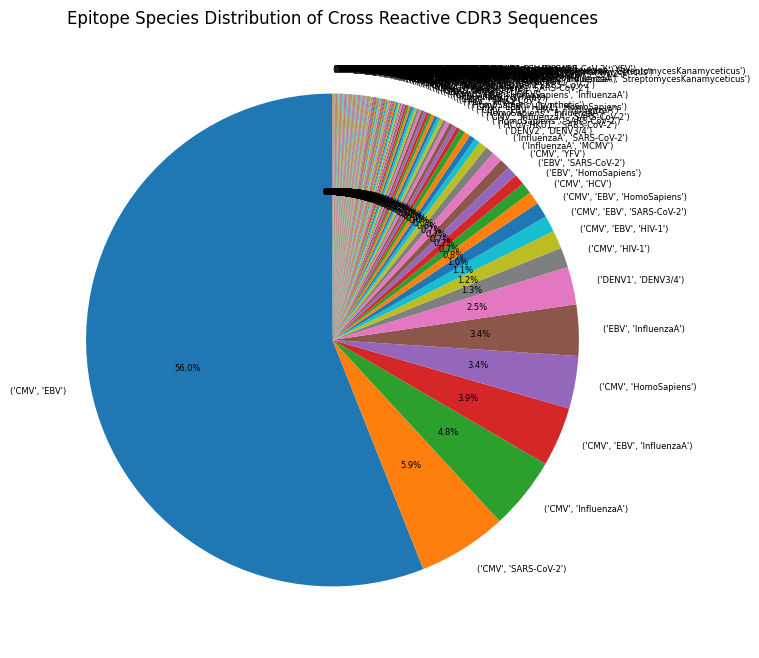

In [ ]:
#VISUALIZATION - ALL
import matplotlib.pyplot as plt
#Making sure that the chart will order potions from largest --> smallest %
sorted_CR_species_distribution = CR_species_distribution.sort_values(by='Count', ascending=False)

#CR_SPECIES_DISTRIBUTION_PIECHART
plt.figure(figsize=(8, 8))
plt.pie(sorted_CR_species_distribution['Count'], labels=sorted_CR_species_distribution['Combination'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6})
plt.title('Epitope Species Distribution of Cross Reactive CDR3 Sequences')
plt.show()

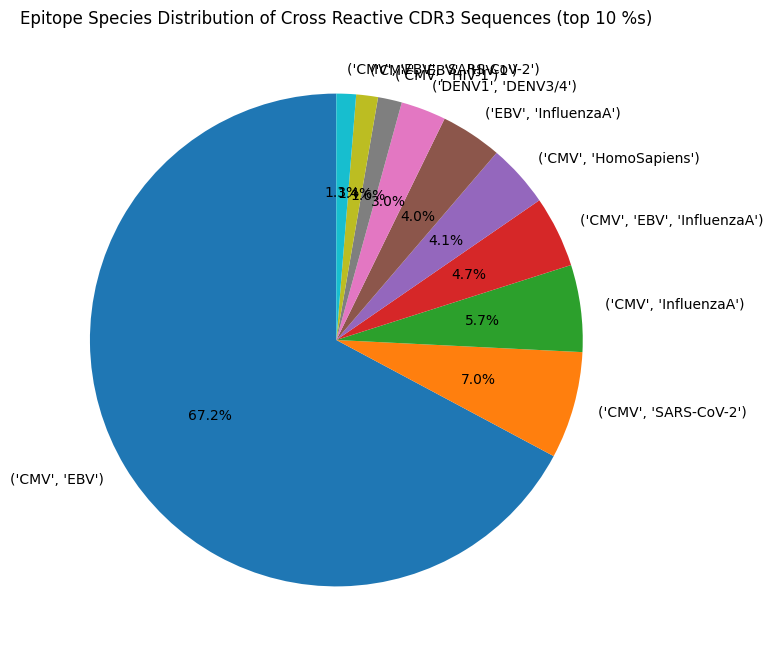

In [ ]:
#VISUALIZATION - top 10% only
import matplotlib.pyplot as plt
#CR_SPECIES_DISTRIBUTION_PIECHART
# Sort cCR_species_distribution by Count in descending order
sorted_CR_species_distribution = CR_species_distribution.sort_values(by='Count', ascending=False)

# Select the top 10 combinations
top_10_combinations = sorted_CR_species_distribution.head(10)

# Plotting a pie chart for the top 10 combinations
plt.figure(figsize=(8, 8))
plt.pie(top_10_combinations['Count'], labels=top_10_combinations['Combination'], autopct='%1.1f%%', startangle=90,textprops={'fontsize': 10})
plt.title('Epitope Species Distribution of Cross Reactive CDR3 Sequences (top 10 %s)')
plt.show()

In [ ]:
print(Total_CDR3_count)
print(CR_CDR3_count)

62563
3364
